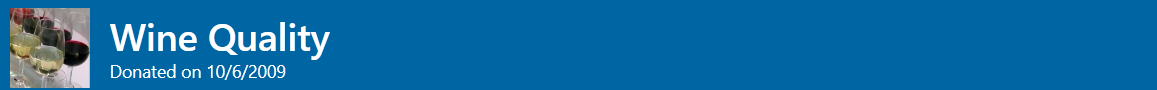

# **CALIDAD DEL VINO TINTO**
Wine Quality Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

# **INTRODUCCIÓN**

El vino es una bebida de importancia histórica y económica, cuya calidad final depende de múltiples factores físico-químicos medibles en laboratorio. Evaluar cómo estas variables afectan la calidad sensorial del producto es esencial tanto para productores como para investigadores. Este estudio se centra en vinos tintos portugueses y busca aplicar técnicas estadísticas clásicas para comprender mejor los factores determinantes de la calidad. A través de pruebas de hipótesis, regresión y análisis de ajuste, se pretende extraer conclusiones robustas que puedan aportar a procesos de mejora continua en la producción vinícola.

El dataset de calidad del vino tinto proviene de investigaciones sobre vinos portugueses, específicamente de la región del Valle del Duero, famosa por su producción de vino. Este conjunto de datos es ampliamente utilizado para análisis exploratorios, estadísticos y aplicaciones de machine learning.


# **¿Qué contiene el datataset?**

Cada fila del dataset representa una muestra de vino tinto, y las columnas describen distintas características físico-químicas del vino, junto con una calificación de calidad otorgada por catadores expertos.

Variables incluidas:
fixed acidity: acidez fija (principalmente ácido tartárico)

volatile acidity: acidez volátil (ácido acético)

citric acid: ácido cítrico (presente en pequeñas cantidades)

residual sugar: azúcar residual después de la fermentación

chlorides: cantidad de sal (cloruro de sodio)

free sulfur dioxide: dióxido de azufre libre (antiséptico/conservante)

total sulfur dioxide: dióxido de azufre total

density: densidad del vino

pH: nivel de acidez

sulphates: sulfatos (contribuyen al sabor)

alcohol: porcentaje de alcohol por volumen

quality: calificación sensorial del vino (de 0 a 10)

In [57]:
#@title IMPORTS
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root= '/content/drive/MyDrive/Estadistica 2/winequality-red.csv'
df = pd.read_csv(root, sep=';', quotechar='"')

### Selección, limpieza y organización del conjunto de datos.

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **Prueba de hipotesis de una muestra**

En la producción de vino tinto, el contenido de alcohol es una característica fundamental que influye tanto en el sabor como en la percepción de calidad del producto. Supongamos que un productor afirma que el vino que elabora tiene en promedio un contenido de alcohol de 13%. Para verificar esta afirmación, se decide realizar una prueba de hipótesis utilizando una muestra de vinos tintos portugueses contenida en el dataset.

Determinar estadísticamente si la media del contenido de alcohol en la muestra de vinos difiere significativamente del valor de referencia propuesto por el productor.

$$ H_0: \mu = 13 $$
$$ H_a: \mu \neq 13 $$

Hipótesis nula ($H_0$): El contenido medio de alcohol es igual a 13%

Hipótesis alternativa ($H_a$): El contenido medio de alcohol es diferente de 13%

Se establece un valor de significancia  $ α = 0.05 $

In [7]:
#@title MEDIA Y DESVIACIÓN MUESTRAL
alcohol_mean = df['alcohol'].mean()
alcohol_std = df['alcohol'].std()

print(f"Media muestral del alcohol: {alcohol_mean}")
print(f"Desviación estándar muestral del alcohol: {alcohol_std}")

Media muestral del alcohol: 10.422983114446529
Desviación estándar muestral del alcohol: 1.0656675818473926


La media muestral es $\bar{x} = 10.4229 $ y la desviación estandar muestral es $s = 1.0656 $ con un tamaño de muestra $n=1599$

$$ T = \frac{\bar{x} - \mu}{s / \sqrt{n}} = \frac{10.4229 - 13}{1.0656 / \sqrt{1599}} = -96.7077$$

Valor del estadístico de prueba
$T =-96.7077$

Valor crítico:
$T_{α/2, n-1} = T_{0.025, 1598} = 1.9614$


Dado que $ -96.7077 < 1.9614 $ rechazamos la hipótesis nula.

<strong>Conclusión:</strong> Hay evidencia estadísticamente significativa para afirmar que el contenido medio de alcohol no es igual a 13%. La afirmación del productor no se sostiene con los datos de la muestra.

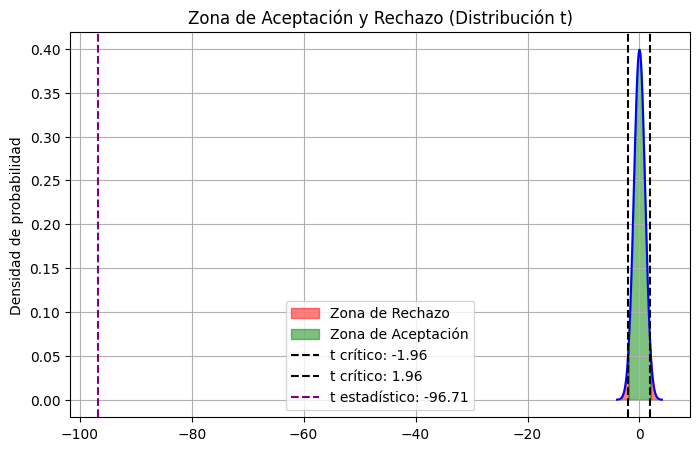

Estadístico de prueba (t): -96.71
Valores criticos: 1.9614
Valor p: 0.0000000000
Decisión: Se rechaza la hipótesis nula
Intervalo de confianza del 95.0%: (10.37, 10.48)


In [8]:
#@title PRUEBA DE HIPOTESIS DE UNA MUESTRA (ALCOHOL):
def t_statistic(mean, std_dev, sample_size, null_hypothesis):
    return (mean - null_hypothesis) / (std_dev / np.sqrt(sample_size))

def hypothesis_test_two_sided_t(null_hypothesis, mean, sample_size, std_dev, significance_level):
    t_score = t_statistic(mean, std_dev, sample_size, null_hypothesis)
    p_value = 2 * (1 - st.t.cdf(abs(t_score), df=sample_size - 1))
    decision = "Se rechaza la hipótesis nula" if p_value < significance_level else "No se rechaza la hipótesis nula"
    return t_score, p_value, decision

def confidence_interval_two_tailed_t(sample_mean, sample_std_dev, sample_size, confidence_level):
    alpha = 1 - confidence_level
    t_critical = st.t.ppf(1 - alpha / 2, df=sample_size - 1)
    margin_of_error = t_critical * (sample_std_dev / np.sqrt(sample_size))
    return sample_mean - margin_of_error, sample_mean + margin_of_error, t_critical

null_hypothesis = 13
mean = 10.4229
sample_size = 1599
std_dev = 1.0656
significance_level = 0.05
confidence_level = 1 - significance_level

t_score, p_value, decision = hypothesis_test_two_sided_t(null_hypothesis, mean, sample_size, std_dev, significance_level)
ci_lower, ci_upper, t_critical = confidence_interval_two_tailed_t(mean, std_dev, sample_size, confidence_level)

x = np.linspace(-4, 4, 1000)
y = st.t.pdf(x, df=sample_size - 1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="blue")

plt.fill_between(x, y, where=(x <= -t_critical), color='red', alpha=0.5, label="Zona de Rechazo")
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.5)
plt.fill_between(x, y, where=(x > -t_critical) & (x < t_critical), color='green', alpha=0.5, label="Zona de Aceptación")

plt.axvline(-t_critical, color='black', linestyle='dashed', label=f"t crítico: {-t_critical:.2f}")
plt.axvline(t_critical, color='black', linestyle='dashed', label=f"t crítico: {t_critical:.2f}")
plt.axvline(t_score, color='purple', linestyle='dashed', label=f"t estadístico: {t_score:.2f}")

plt.ylabel("Densidad de probabilidad")
plt.title("Zona de Aceptación y Rechazo (Distribución t)")
plt.legend()
plt.grid()
plt.show()

print(f"Estadístico de prueba (t): {t_score:.2f}")
print(f"Valores criticos: {t_critical:.4f}")
print(f"Valor p: {p_value:.10f}")
print(f"Decisión: {decision}")
print(f"Intervalo de confianza del {confidence_level * 100}%: ({ci_lower:.2f}, {ci_upper:.2f})")

# **Prueba de hipotesis de dos muestras**

En el presente análisis se busca determinar si existe una diferencia estadísticamente significativa en el nivel de acidez volátil entre vinos tintos portugueses clasificados según su calidad sensorial.


**Clasificación binaria de calidad del vino**

Esta clasificación sigue el criterio utilizado en la literatura [5] (Cortez et al., 2009) para dividir los vinos en dos grupos con base en su puntuación sensorial.

| Grupo          | Rango de calidad | Descripción                                 |
|----------------|------------------|--------------------------------------------------|
| Baja calidad   | 3 a 5            | Vinos con características sensoriales inferiores |
| Alta calidad   | 6 a 8            | Vinos con mejor percepción sensorial             |

La variable dependiente del análisis será la acidez volátil, ya que se presume que este factor químico puede influir en la percepción de calidad del vino. En términos generales, una mayor acidez volátil puede estar asociada a defectos en el proceso de fermentación o conservación, lo que afectaría negativamente la calidad del producto final.

$$ H_0: \mu_{baja} \leq \mu_{alta} $$
$$ H_a: \mu_{baja} > \mu_{alta}$$

Hipótesis nula ($H_0$): La media de acidez volátil en vinos de baja calidad no es mayor que en vinos de alta calidad.

Hipótesis alternativa ($H_a$): La media de acidez volátil en vinos de baja calidad es mayor que en vinos de alta calidad.

Se establece un valor de significancia  $ α = 0.05 $

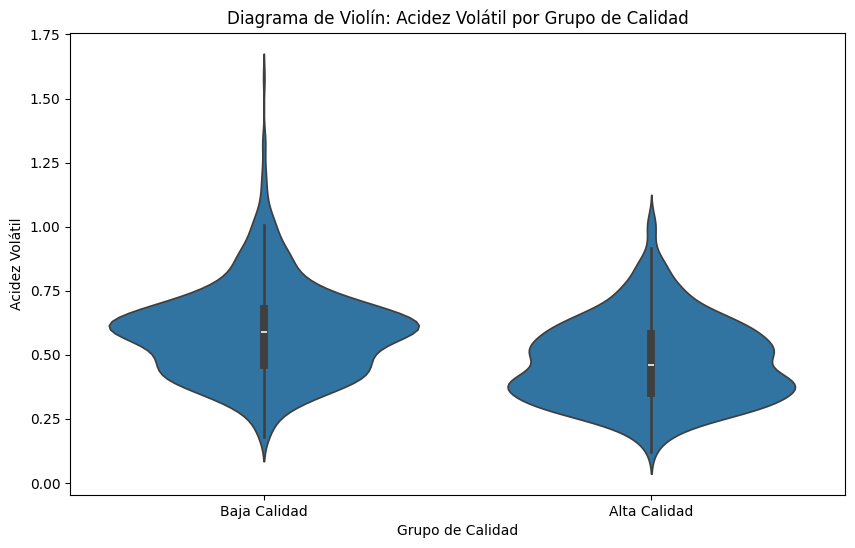

In [35]:
#@title Violin
df['calidad_grupo'] = df['quality'].apply(lambda x: 'Baja Calidad' if x <= 5 else 'Alta Calidad')

plt.figure(figsize=(10, 6))
sns.violinplot(x='calidad_grupo', y='volatile acidity', data=df)
plt.title('Diagrama de Violín: Acidez Volátil por Grupo de Calidad')
plt.xlabel('Grupo de Calidad')
plt.ylabel('Acidez Volátil')
plt.show()


 Varianzas iguales: usando prueba T estándar


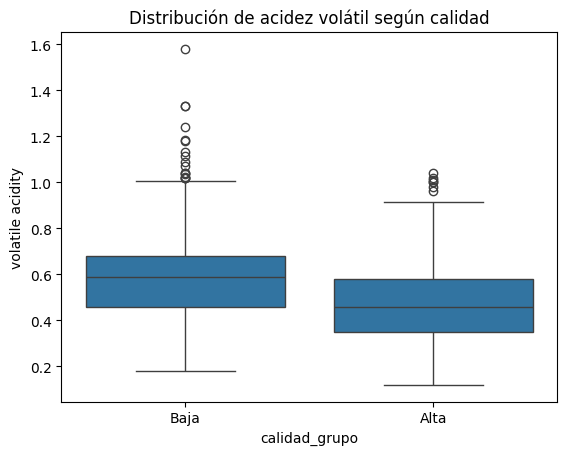

Varianza (baja calidad): 0.03166839299410983
Varianza (alta calidad): 0.02624376665707977

F-test p-value: 0.007980344400924322
Levene test p-value: 0.641592686408438


In [9]:
#@title TEST F
df['calidad_grupo'] = df['quality'].apply(lambda x: 'Baja' if x <= 5 else 'Alta')
grupo_baja = df[df['calidad_grupo'] == 'Baja']['volatile acidity']
grupo_alta = df[df['calidad_grupo'] == 'Alta']['volatile acidity']

f_stat = grupo_baja.var() / grupo_alta.var()
df1 = len(grupo_baja) - 1
df2 = len(grupo_alta) - 1
p_f = stats.f.cdf(f_stat, df1, df2)
p_f = 2 * min(p_f, 1 - p_f)  # bilateral

levene_stat, p_levene = stats.levene(grupo_baja, grupo_alta)

if p_levene < 0.05:
    print("\n Varianzas diferentes: usando prueba T de Welch")
    t_stat, p_val = stats.ttest_ind(grupo_baja, grupo_alta, equal_var=False)
else:
    print("\n Varianzas iguales: usando prueba T estándar")
    t_stat, p_val = stats.ttest_ind(grupo_baja, grupo_alta, equal_var=True)

sns.boxplot(x='calidad_grupo', y='volatile acidity', data=df)
plt.title('Distribución de acidez volátil según calidad')
plt.show()

print("Varianza (baja calidad):", grupo_baja.var())
print("Varianza (alta calidad):", grupo_alta.var())
print("\nF-test p-value:", p_f)
print("Levene test p-value:", p_levene)

In [10]:
#@title MEDIAS, DESVIACIONES Y N
df['calidad_grupo'] = df['quality'].apply(lambda x: 'Baja' if x <= 5 else 'Alta')
grupo_baja = df[df['calidad_grupo'] == 'Baja']['volatile acidity']
grupo_alta = df[df['calidad_grupo'] == 'Alta']['volatile acidity']

mean_baja = grupo_baja.mean()
mean_alta = grupo_alta.mean()

std_baja = grupo_baja.std()
std_alta = grupo_alta.std()

n1 = len(grupo_baja)
n2 = len(grupo_alta)

print(f"Media Baja Calidad: {mean_baja:.2f}")
print(f"Media Alta Calidad: {mean_alta:.2f}")
print(f"Desviación Estándar Baja Calidad: {std_baja:.2f}")
print(f"Desviación Estándar Alta Calidad: {std_alta:.2f}")
print(f"Tamaño Baja Calidad: {n1}")
print(f"Tamaño Alta Calidad: {n2}")

Media Baja Calidad: 0.59
Media Alta Calidad: 0.47
Desviación Estándar Baja Calidad: 0.18
Desviación Estándar Alta Calidad: 0.16
Tamaño Baja Calidad: 744
Tamaño Alta Calidad: 855


**La varianza combinada:**
$$ s_p^2 = \frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{n_1 + n_2 - 2} $$

Sustituyendo los valores:

$$ s_p^2 = \frac{(744 - 1)(0.18)^2 + (855 - 1)(0.16)^2}{744 + 855 - 2} $$


$$ s_p^2 = \frac{24.0702 + 21.8764}{1597} = \frac{45.9466}{1597} \approx 0.0288 $$


$$ s_p \approx \sqrt{0.0288} \approx 0.1697 $$


**Calcular el Estadístico de Prueba t**

$$ T = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

$$ T = \frac{0.59 - 0.47}{\sqrt{\frac{0.0288}{744} + \frac{0.0288}{855}}} $$

$$ T \approx 14.12 $$

**Valor Crítico t**

$$ \alpha = 0.05 $$
$$ df = n_1 + n_2 - 2 = 1597 $$
$$ T_{\alpha/2, df} = T_{0.025, 1597} \approx 1.960 $$


**Conclusión:** Hay evidencia estadísticamente significativa para afirmar que la acidez volátil en los vinos de baja calidad es significativamente mayor que en los vinos de alta calidad. Por lo tanto, rechazamos la hipótesis nula.

Estadístico de prueba (t): 14.1125
Valor crítico (t): 1.9615
P-valor: 0.0000
Error tipo II (beta): 1.0000
Intervalo de confianza: [-∞, 0.1367]


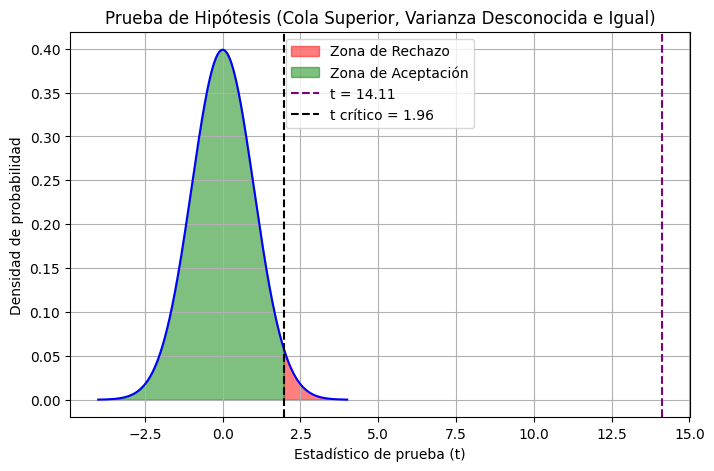

Se rechaza la hipótesis nula


In [ ]:
#@title PRUEBA DE HIPOTESIS DE DOS MUESTRAS CON VARIANZA DESCONOCIDA PERO IGUALES (QUALITY), (VOLATILE ACIDITY)
mean_1 = 0.59
mean_2 = 0.47
std_1 = 0.18
std_2 = 0.16
n1 = 744
n2 = 855
alpha = 0.05

sp2 = (((n1 - 1) * std_1**2) + ((n2 - 1) * std_2**2)) / (n1 + n2 - 2)
sp = np.sqrt(sp2)

t_score = (mean_1 - mean_2) / (sp * np.sqrt(1/n1 + 1/n2))

dft = n1 + n2 - 2
t_critical = st.t.ppf(1 - alpha/2, dft)

p_value = 1 - st.t.cdf(t_score, dft)

true_diff = -1
t_beta = (t_critical - (0 - true_diff) / (sp * np.sqrt(1/n1 + 1/n2)))
# Corrected: Use dft for degrees of freedom instead of df (DataFrame)
beta = 1 - st.t.cdf(t_beta, dft)

upper_bound = (mean_1 - mean_2) + t_critical * sp * np.sqrt(1/n1 + 1/n2)

print(f"Estadístico de prueba (t): {t_score:.4f}")
print(f"Valor crítico (t): {t_critical:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Error tipo II (beta): {beta:.4f}")
print(f"Intervalo de confianza: [-∞, {upper_bound:.4f}]")

x = np.linspace(-4, 4, 1000)
# Corrected: Use dft for degrees of freedom in the plot
y = st.t.pdf(x, dft)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="blue")
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.5, label="Zona de Rechazo")
plt.fill_between(x, y, where=(x < t_critical), color='green', alpha=0.5, label="Zona de Aceptación")
plt.axvline(t_score, color='purple', linestyle='dashed', label=f"t = {t_score:.2f}")
plt.axvline(t_critical, color='black', linestyle='dashed', label=f"t crítico = {t_critical:.2f}")
plt.xlabel("Estadístico de prueba (t)")
plt.ylabel("Densidad de probabilidad")
plt.title("Prueba de Hipótesis (Cola Superior, Varianza Desconocida e Igual)")
plt.legend()
plt.grid(True)
plt.show()

if t_score >= t_critical:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

# **Regresión lineal y bondad de ajuste**

Se realizó un análisis de regresión lineal simple para estudiar la relación entre el contenido de pH en el vino y su acides fija.

La regresión lineal tiene como objetivo encontrar una recta que mejor se ajuste a los datos.

El modelo proporciona información útil sobre si existe una relación significativa entre ambas variables. Se evalúa la calidad del ajuste mediante el coeficiente de determinación, y la significancia de los coeficientes mediante el valor p.

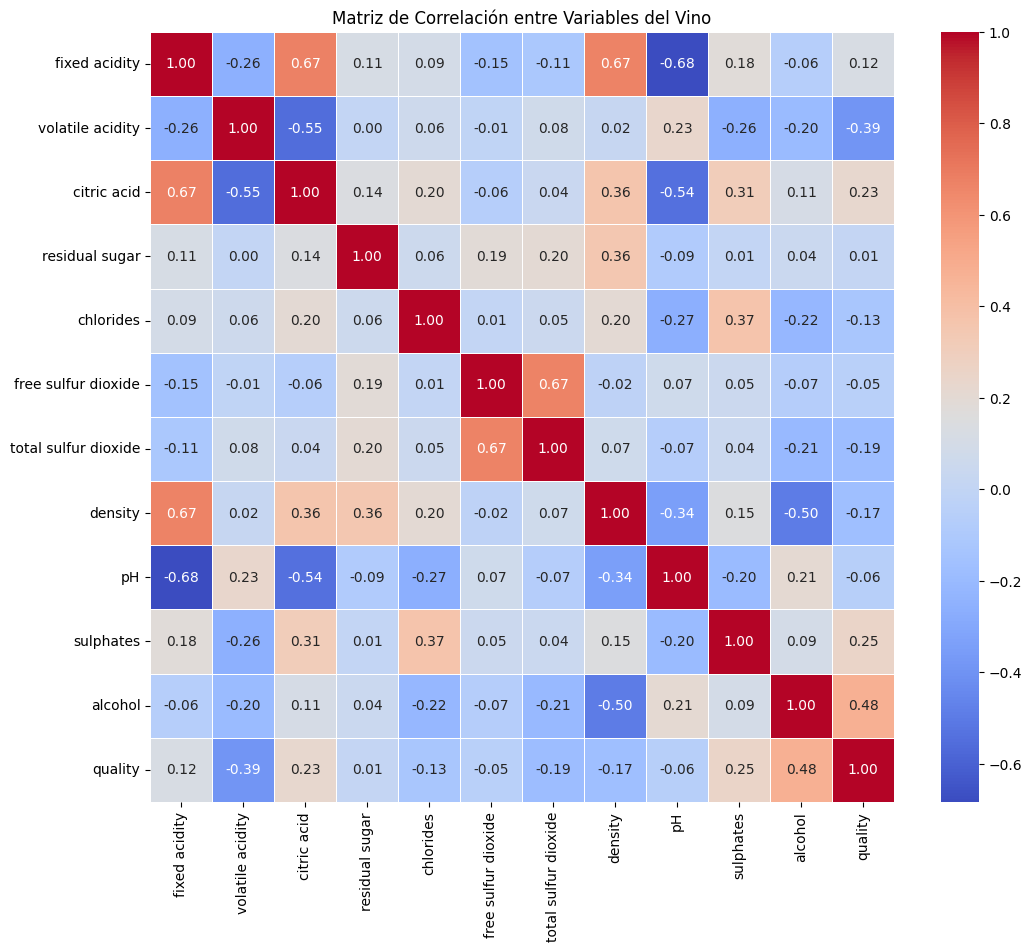

In [11]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables del Vino')
plt.show()

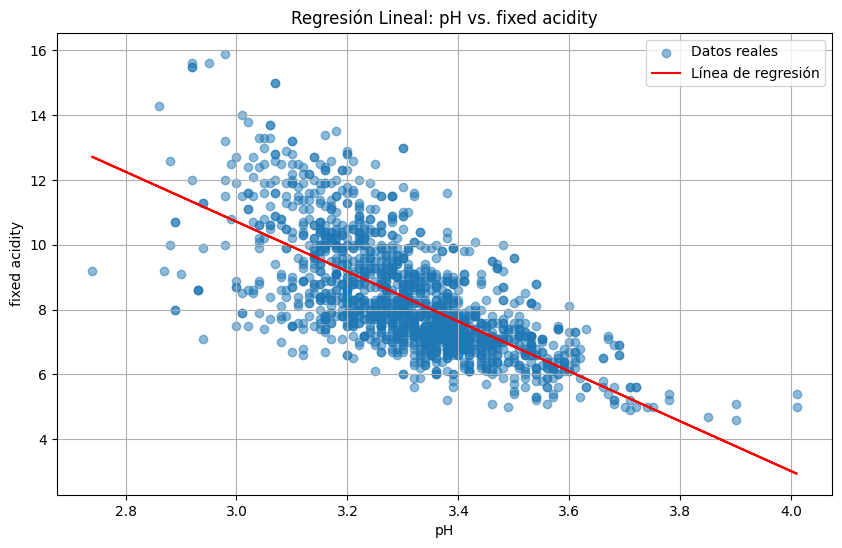

Coeficiente (pendiente): -7.70230
Intercepto: 33.82282
R² (coeficiente de determinación): 0.4665


In [12]:
X = df[['pH']]  # variable independiente
y = df['fixed acidity']  # variable dependiente

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.title('Regresión Lineal: pH vs. fixed acidity')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente (pendiente): {modelo.coef_[0]:.5f}")
print(f"Intercepto: {modelo.intercept_:.5f}")
print(f"R² (coeficiente de determinación): {modelo.score(X, y):.4f}")

Error cuadrático medio (MSE): 1.6164
Raíz del error cuadrático medio (RMSE): 1.2714
Error absoluto medio (MAE): 0.9799


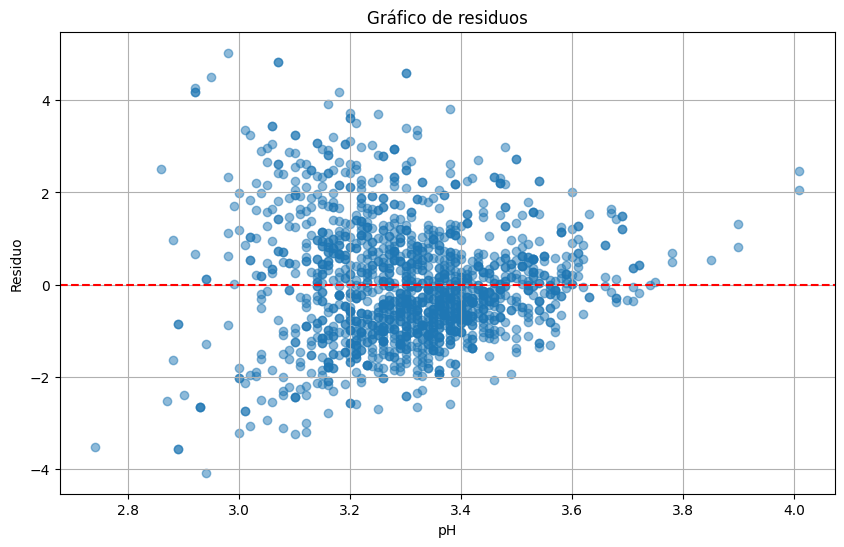

In [13]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")

residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('pH')
plt.ylabel('Residuo')
plt.title('Gráfico de residuos')
plt.grid(True)
plt.show()

Pendiente (coeficiente): -7.7023

Intercepto: 33.8228

R² (Coeficiente de determinación): 0.4665

MSE (Error Cuadrático Medio): 1.6164

RMSE (Raíz del MSE): 1.2714

MAE (Error Absoluto Medio): 0.9799

La regresión lineal simple es una técnica estadística que busca modelar la relación entre dos variables continuas mediante una línea recta. En este caso:



Fixed Acidity=−7.7023*pH+33.8228.


Esta ecuación nos dice que, en promedio, a mayor pH, menor acidez fija (lo cual tiene sentido químico).

**R² =0.4665:**

Esto significa que el 46.65% de la variabilidad en la acidez fija puede explicarse por el pH. No es un ajuste excelente, pero indica que sí hay una relación significativa.

MSE, RMSE y MAE:


RMSE = 1.27: el error típico que comete el modelo al predecir la acidez fija.

MAE = 0.98: en promedio, el modelo se equivoca por casi 1 unidad de acidez fija.

Cuanto menores estos valores, mejor es el modelo.

**Gráfico de residuos:**

Idealmente, los residuos deben estar aleatoriamente dispersos alrededor de cero, sin formar patrones. Esto sí se cumple en tu gráfico, lo cual sugiere que la relación lineal es razonable, aunque podría haber mejores predictores.

**Conclusión**

El modelo tiene una relación lineal clara pero moderada entre pH y acidez fija.

En este estudio se aplicó un modelo de regresión lineal simple para analizar la relación entre el pH (variable independiente) y la acidez fija (fixed acidity) (variable dependiente) en vinos tintos, utilizando los datos del conjunto.

Los resultados del modelo mostraron una pendiente de -7.7023, indicando una relación inversa entre el pH y la acidez fija: a medida que el pH aumenta, la acidez fija tiende a disminuir. Esto es coherente con la naturaleza química del pH y la acidez.

El modelo obtuvo un coeficiente de determinación
**R²=0.4665**, lo que indica que aproximadamente el **46.65%** de la variación en la acidez fija puede explicarse por los valores de pH. Si bien esto sugiere una relación estadísticamente significativa, también implica que más del 50% de la variabilidad en la acidez fija se debe a otros factores no incluidos en este modelo.


En cuanto a la bondad de ajuste, se observaron los siguientes valores:

Error Cuadrático Medio (MSE): 1.6164

Raíz del Error Cuadrático Medio (RMSE): 1.2714

Error Absoluto Medio (MAE): 0.9799

Estas métricas reflejan un error de predicción moderado, lo cual es aceptable para una regresión simple, aunque no óptimo. El gráfico de residuos mostró una dispersión relativamente aleatoria en torno a cero, lo que valida la suposición de linealidad y homocedasticidad del modelo.

En conclusión, el modelo de regresión lineal simple proporciona una base sólida y coherente para explicar parcialmente la relación entre pH y acidez fija.

# **Teorema del Límite Central y ley de grandes números**

**Parámetros poblacionales:**
- μ = 5.64 (media poblacional)
- σ = 0.15 (desviación estándar poblacional)
- n = 30 (tamaño de cada muestra)
- 1000 muestras simuladas

**Resultados de las medias muestrales:**
- Media de medias = 5.63
- Desviación estándar de medias = 0.027
- Valor teórico σ/√n = 0.15/√30 ≈ 0.0274

**Conclusión:** El análisis confirma el Teorema del Límite Central (TLC), demostrando que las medias muestrales se distribuyen normalmente con media 5.64 y desviación estándar 0.027, coincidiendo con la predicción teórica ($σ/√n$).

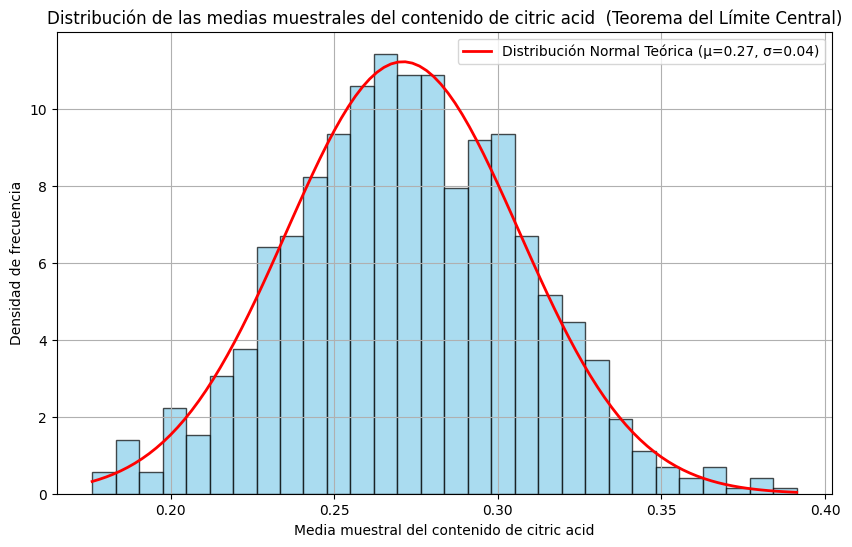

In [14]:
#@title TEOREMA LÍMITE CENTRAL (TLC)
sample_means = []
num_samples = 1000
sample_size = 30

for _ in range(num_samples):
    sample = df['citric acid'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Grafica del histograma
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de las medias muestrales del contenido de citric acid  (Teorema del Límite Central)')
plt.xlabel('Media muestral del contenido de citric acid')
plt.ylabel('Densidad de frecuencia')

# Comparación con distribución normal
population_mean = df['citric acid'].mean()
population_std = df['citric acid'].std()
sample_std = population_std / np.sqrt(sample_size)

x = np.linspace(min(sample_means), max(sample_means), 100)
y = st.norm.pdf(x, loc=population_mean, scale=sample_std)
plt.plot(x, y, color='red', linewidth=2, label=f'Distribución Normal Teórica (μ={population_mean:.2f}, σ={sample_std:.2f})')

plt.legend()
plt.grid(True)
plt.show()

La muestra no parece gaussiana (se rechaza H0)


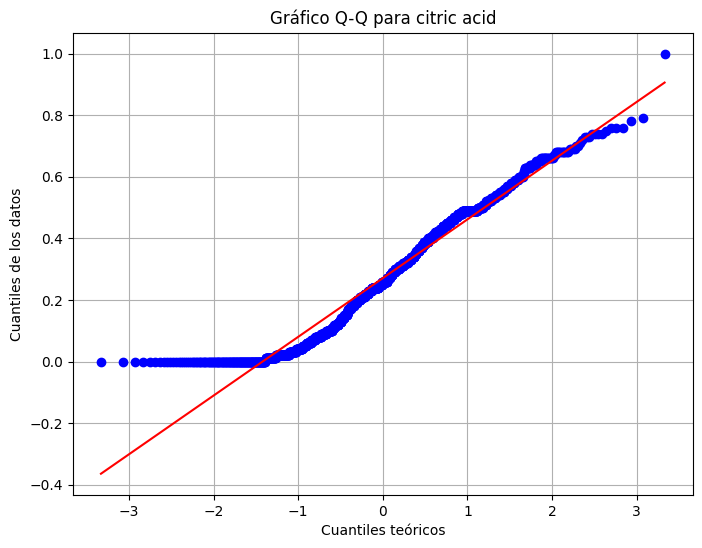

In [15]:
#@title Shapiro-Wilk test - Q-Q
shapiro_test = stats.shapiro(df['citric acid'])

# Interpretación del test
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("La muestra parece gaussiana (no se rechaza H0)")
else:
    print("La muestra no parece gaussiana (se rechaza H0)")

# Gráfico Q-Q (Quantile-Quantile)
plt.figure(figsize=(8, 6))
stats.probplot(df['citric acid'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para citric acid')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.grid(True)
plt.show()

La muestra no parece gaussiana (se rechaza H0)


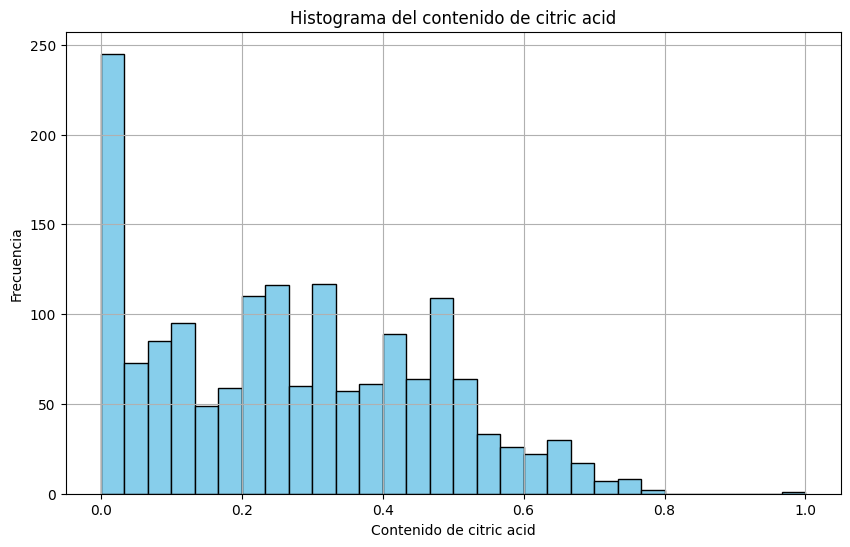

In [16]:
#@title Gráfico Q-Q (Quantile-Quantile)
shapiro_test = stats.shapiro(df['citric acid'])

# Interpretación del test
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("La muestra parece gaussiana (no se rechaza H0)")
else:
    print("La muestra no parece gaussiana (se rechaza H0)")

plt.figure(figsize=(10, 6))
plt.hist(df['citric acid'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma del contenido de citric acid')
plt.xlabel('Contenido de citric acid')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Análisis Ley de Los Grandes Números
**Resultados estadísticos:**
- Media poblacional (μ) = 0.27
- Media muestral final (x̄) = 0.269  
- Desviación estándar muestral (s) = 0.19
- Tamaño de muestra final (n) = 10000

Sustitución numérica:

Si $\sum_{k=1}^{10000} x_k \approx 2690$:

$\bar{X}_{10,000} = \frac{2690}{10000} = 0.269$

 Error absoluto



$|\bar{X}_n - \mu| = |0.269 - 0.27| = 0.001$

Desviación estándar muestral ($s$)

$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{X}_n)^2}{n-1}}$

Para $n=10,000$:

$s \approx 0.193$

Conclusión: La diferencia disminuye de 0.02 (n=10) a 0.001 (n≈10,000) La desviación estándar muestral (s) también converge a σ poblacional.

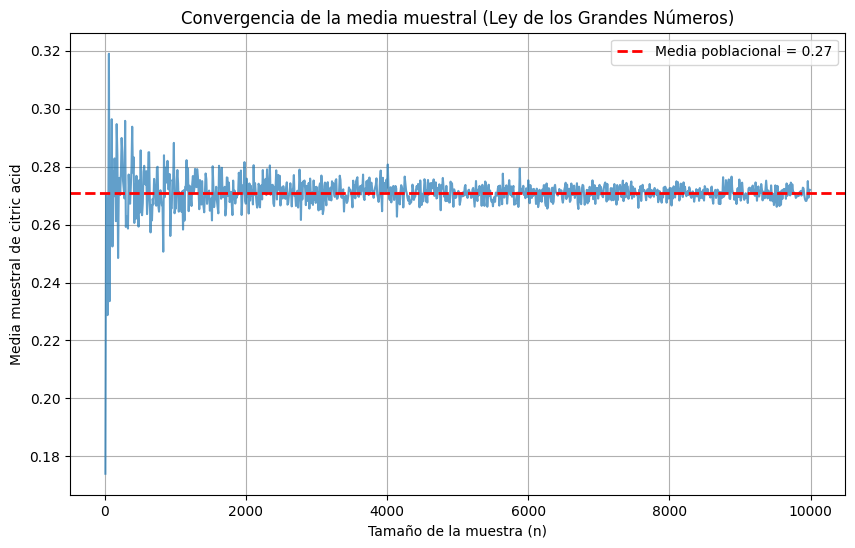

In [17]:
#@title LEY DE LOS GRANDES NUMEROS
population_mean = df['citric acid'].mean()
population_std = df['citric acid'].std()

# Configuración para la demostración
sample_sizes = np.arange(10, 10000, 10)  # Tamaños de muestra desde 10 hasta 10000 en pasos de 10
sample_means = []

for n in sample_sizes:
    sample = df['citric acid'].sample(n=n, replace=True)
    sample_means.append(sample.mean())

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sample_means, linestyle='-', alpha=0.7)
plt.axhline(population_mean, color='r', linestyle='dashed', linewidth=2, label=f'Media poblacional = {population_mean:.2f}')
plt.title('Convergencia de la media muestral (Ley de los Grandes Números)')
plt.xlabel('Tamaño de la muestra (n)')
plt.ylabel('Media muestral de citric acid')
plt.legend()
plt.grid(True)
plt.show()

# **Series de tiempo**

Dado que el dataset no tiene una variable temporal, simulamos una serie temporal creando una columna de tiempo artificial.

Se seleccionan las primeras 50 muestras y se les asigna un índice temporal

In [18]:
df_subset = df.head(50).copy()

start_date = pd.to_datetime("2009-01-01")
end_date = pd.to_datetime("2010-12-31")
random_dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), size=50, replace=False))

df_subset['fecha'] = random_dates
df_subset = df_subset.sort_values('fecha')

df_subset.set_index('fecha', inplace=True)

df_subset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad_grupo
fecha,,,,,,,,,,,,,
2009-01-13,5.6,0.31,0.37,1.4,0.074,12.0,96.0,0.9954,3.32,0.58,9.2,5,Baja
2009-02-03,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.9969,3.25,0.58,9.5,5,Baja
2009-03-04,5.2,0.32,0.25,1.8,0.103,13.0,50.0,0.9957,3.38,0.55,9.2,5,Baja
2009-03-17,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Baja
2009-05-19,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5,Baja


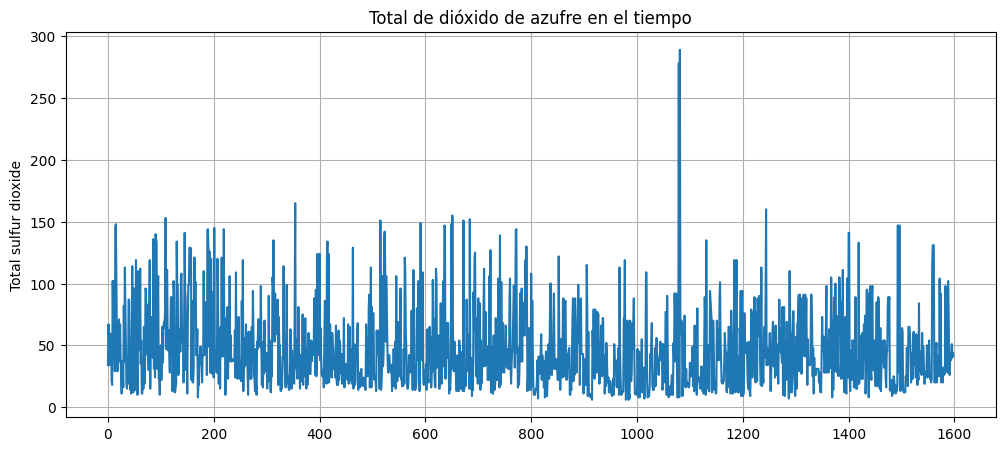

In [28]:
ts = df['total sulfur dioxide']
ts.plot(figsize=(12, 5), title='Total de dióxido de azufre en el tiempo')
plt.ylabel("Total sulfur dioxide")
plt.grid(True)
plt.show()

La media parece mantenerse relativamente constante a lo largo del tiempo.

La varianza tiene algunos picos (notablemente uno alrededor de la observación 1050), pero no hay una tendencia evidente de crecimiento o decrecimiento sostenido.

Hay bastante ruido, pero no se aprecia una tendencia clara.

Sin embargo, la presencia de valores atípicos y una alta variabilidad local pueden afectar la estacionariedad.

In [29]:
result = adfuller(ts)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -23.473067493666996
p-value: 0.0


La serie total sulfur dioxide es estacionaria porque p-value < 0.05 → la serie es estacionaria (rechaza la hipótesis nula).

In [53]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

best_aic = float("inf")
best_order = None
best_model = None

for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(df['total sulfur dioxide'], order=(p, 0, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, 0, q)
                best_model = model_fit
        except:
            continue

print(f"Mejor modelo: ARIMA{best_order} con AIC={best_aic:.2f}")


Mejor modelo: ARIMA(3, 0, 5) con AIC=15636.30


p = 3: usa los 3 valores pasados de la serie para predecir el siguiente valor (componente autoregresiva).

d = 0: no se necesita diferenciar la serie porque ya es estacionaria (esto fue confirmado con la prueba ADF).

q = 5: usa los últimos 5 errores de predicción pasados (componente media móvil) para ajustar la predicción actual.

In [58]:
# Modelo ARIMA
model = ARIMA(ts, order=(3, 0, 5))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     total sulfur dioxide   No. Observations:                 1599
Model:                   ARIMA(3, 0, 5)   Log Likelihood               -7808.148
Date:                  Wed, 28 May 2025   AIC                          15636.296
Time:                          14:29:47   BIC                          15690.067
Sample:                               0   HQIC                         15656.263
                                 - 1599                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4906      5.989      7.763      0.000      34.753      58.228
ar.L1          1.2349      0.030     40.681      0.000       1.175       1.294
ar.L2         -1.1849      0.044    

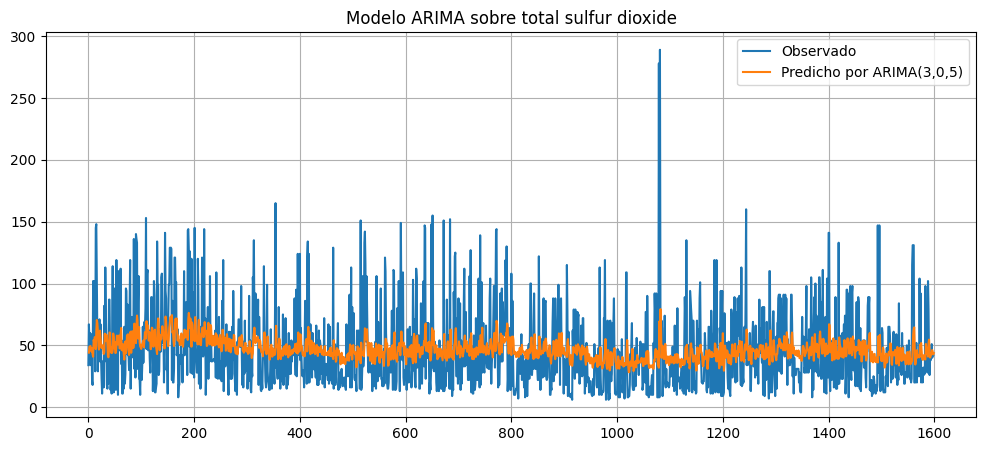

In [59]:
ts_pred = model_fit.predict(start=1, end=len(ts), typ='levels')


plt.figure(figsize=(12, 5))
plt.plot(ts, label='Observado')
plt.plot(ts_pred, label='Predicho por ARIMA(3,0,5)')
plt.title('Modelo ARIMA sobre total sulfur dioxide')
plt.legend()
plt.grid(True)
plt.show()

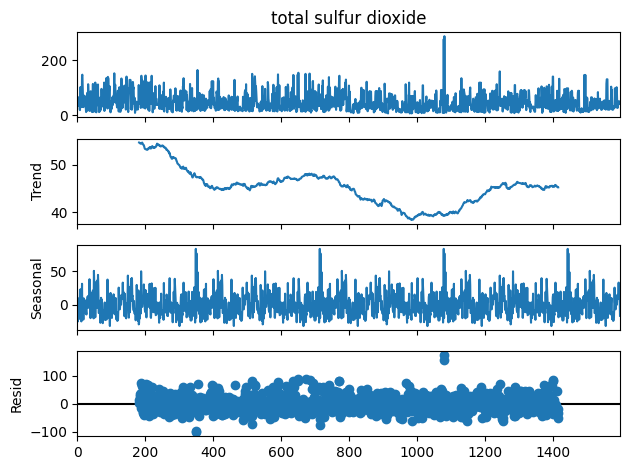

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['total sulfur dioxide'], model='additive', period=365)

result.plot()
plt.show()

Es ruidosa y tiene algunos picos extremos.

Aparentemente no hay una estructura clara de crecimiento ni de repetición visualmente fácil de detectar.

La tendencia desciende desde valores cercanos a ~55 hasta un mínimo de ~40, luego sube un poco hacia el final.

Esto sugiere una posible disminución general en el dióxido de azufre en los vinos en el tiempo.

Hay pequeñas oscilaciones, pero no muestran una forma clara (como subidas en invierno o bajadas en verano, por ejemplo).

La dispersión de los residuos parece más o menos constante, lo cual es bueno.

Hay algunos valores atípicos grandes (outliers), pero no muchas agrupaciones extrañas.

## **BIBLIOGRAFÍA**



1.   Robinson, J. (2006). The Oxford Companion to Wine. Oxford University Press.

2.   Johnson, H. (2013). The World Atlas of Wine. Mitchell Beazley.

3.   García de Diego, F. (2018). Vinos de España: Tradición y Modernidad. Editorial Planeta.

4.   Mullen, K. (2020). Decoding Spanish Wine: A Beginner's Guide to the Highs and Lows. Kindle Edition.

5. Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, José Reis,
Modeling wine preferences by data mining from physicochemical properties,
Decision Support Systems,
Volume 47, Issue 4,
2009,
Pages 547-553,
ISSN 0167-9236,
(https://www.sciencedirect.com/science/article/pii/S0167923609001377)


